<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/pytorch/AlexAndResNetClassificationExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sources:**
- ['56 - ResNet Paper Implementation From Scratch with PyTorch'](https://www.youtube.com/watch?v=P8U1VL93jzA&t=1298s) by Rohan-Paul-AI, YouTube Tutorial ([Code](https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/blob/master/Computer_Vision/56-ResNet56_From_Scratch_PyTorch.ipynb))


# SetUp

## Imports

In [ ]:
# Standard imports.
from typing import List, Set, Dict, Tuple, Any, Callable, Union
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ML imports.
import torch
from torchvision import transforms, models

In [ ]:
# Imports to read images.
from PIL import Image

## Input processing
Input: Images

In [ ]:
home_dir = 'sample_data/' # ''

image_url_cat = home_dir + "cat.jpeg"
image_url_cat_squirl = home_dir + "cat_and_squirl.jpeg"
imagenet_classes_path = home_dir + "ImageNet1000Classes.txt"

In [ ]:
img0 = Image.open(image_url_cat)
img1 = Image.open(image_url_cat_squirl)
imgs = [img0, img1]

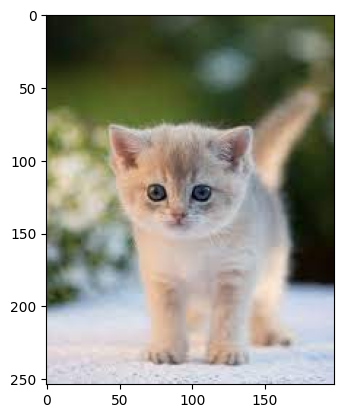

In [ ]:
plt.imshow(img0)

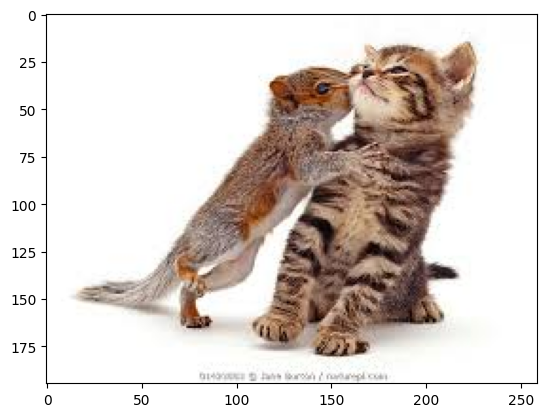

In [ ]:
plt.imshow(img1)

In [ ]:
# Load the imagenet classes.
with open(imagenet_classes_path) as classesfile:
    imagenet_classes = [line.strip() for line in classesfile.readlines()]

## Transforms (ResNet and Alex Net)

In [ ]:
# Define the desired image transformations.
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [ ]:
# Apply the transformations.
imgs_t = []
for img in imgs:
    imgs_t.append(transform(img))

In [ ]:
for img in imgs_t:
    print(f"Shape: {img.shape},\tType: {type(img)}")

Shape: torch.Size([3, 224, 224]),	Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 224, 224]),	Type: <class 'torch.Tensor'>


In [ ]:
# Convert the images into a Batch Format
imgs_batch = []
for img in imgs_t:
    imgs_batch.append(torch.unsqueeze(img, 0))

In [ ]:
for img in imgs_batch:
    print(f"Shape: {img.shape},\tType: {type(img)}")

Shape: torch.Size([1, 3, 224, 224]),	Type: <class 'torch.Tensor'>
Shape: torch.Size([1, 3, 224, 224]),	Type: <class 'torch.Tensor'>


## Model evaluation methods

In [ ]:
def eval_for_single_class(model_output):
    # Get the prediction with highest confidence.
    _, predicted_class = torch.max(model_output, 1)
    # Apply the softmax function to the confidence, to get a percent value.
    percentage = torch.softmax(model_output, dim=1)[0] * 100
    # Look up the name/text-description of the predicted class and return it with the confidence in percent.
    return imagenet_classes[predicted_class[0]], percentage[predicted_class[0]].item()

In [ ]:
def eval_for_multi_class(model_output, n=5):
    # Rank the predictions by highest confidence.
    _, predicted_classes = torch.sort(output, descending=True)
    # Apply the sigmoid function to the confidences, to get percent values.
    percentages = torch.sigmoid(output)[0] * 100
    # Look up the names/text-descriptions of the predicted classes and return them with their confidences in percent.
    # Only return the 'n' highest.
    return [(imagenet_classes[i], percentages[i].item()) for i in predicted_classes[0][:n]]

# ResNet

## Single-Label Classification

In [ ]:
# Print all torchvision models.
# dir(models)

In [ ]:
# Load the ResNet Model.
resnet = models.resnet50(weights='DEFAULT')
# Activate the evaluation mode.
resnet.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 167MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
output = resnet(imgs_batch[0])
print(eval_for_single_class(output))

("285: 'Egyptian cat',", 24.092370986938477)


## Multi-Label Classification

In [ ]:
# Load the ResNet Model.
resnet = models.resnet152(weights='DEFAULT')
# Activate the evaluation mode.
resnet.eval()

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100%|██████████| 230M/230M [00:01<00:00, 151MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
output = resnet(imgs_batch[1])
print(eval_for_multi_class(output))

[("281: 'tabby, tabby cat',", 99.93977355957031), ("285: 'Egyptian cat',", 98.48114013671875), ("335: 'fox squirrel, eastern fox squirrel, Sciurus niger',", 98.32479095458984), ("377: 'marmoset',", 98.15495300292969), ("283: 'Persian cat',", 97.7915267944336)]


# AlexNet

## Single-Label Classification

In [ ]:
# Load the AlexNet Model.
alexnet = models.alexnet(weights='DEFAULT')
alexnet.eval()
output = alexnet(imgs_batch[0])

print(eval_for_single_class(output))

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 85.0MB/s]


("278: 'kit fox, Vulpes macrotis',", 53.04541015625)


## Multi-Label Classification

In [ ]:
# Load the ResNet Model.
resnet = models.alexnet(weights='DEFAULT')
# Activate the evaluation mode.
resnet.eval()
output = resnet(imgs_batch[1])
print(eval_for_multi_class(output))

[("271: 'red wolf, maned wolf, Canis rufus, Canis niger',", 99.99979400634766), ("299: 'meerkat, mierkat',", 99.99978637695312), ("281: 'tabby, tabby cat',", 99.99976348876953), ("380: 'titi, titi monkey',", 99.99974060058594), ("285: 'Egyptian cat',", 99.99974060058594)]
